# Object Detection using YOLOv7 model on custom dataset.

### By-Pravar Kochar

Clone the YOLOv7 repo to host and install the requirements for the model.

In [ ]:
!git clone https://github.com/WongKinYiu/yolov7.git
%cd yolov7
!pip install -r requirements.txt

Cloning into 'yolov7'...
remote: Enumerating objects: 1191, done.
remote: Total 1191 (delta 0), reused 0 (delta 0), pack-reused 1191
Receiving objects: 100% (1191/1191), 74.22 MiB | 28.38 MiB/s, done.
Resolving deltas: 100% (515/515), done.
/content/yolov7
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.9 MB/s eta 0:00:00


In the cloned repository, download the weigths file of desire to run the respective YOLOv7 model. (Here YOLOv7-tiny is choosen as the model to run)

In [ ]:
%cd /content/yolov7/
!wget "https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-tiny.pt"

Download the custom dataset to train the model on, using a Gender-detection dataset from roboflow.

In [ ]:
%cd /content/yolov7/data
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="GVyUq5V29DIdqx7riBMO")
project = rf.workspace("trainmodel").project("gender-detection-qiyyg")
dataset = project.version(1).download("yolov7")

/content/yolov7/data
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Gender-Detection-1 in yolov7pytorch:: 100%|██████████| 4616/4616 [00:00<00:00, 7801.65it/s]


*The path written in data.yaml of the dataset needs to be given the full path, correction for it.*

> Indented block



In [ ]:
def full_path_correction():
  # Replace the paths with the full file path.
  data_read = open("/content/yolov7/data/Gender-Detection-1/data.yaml", "r")
  content = data_read.read()
  content = content.replace("Gender-Detection-1/train/images", "/content/yolov7/data/Gender-Detection-1/train/images")
  content = content.replace("Gender-Detection-1/valid/images", "/content/yolov7/data/Gender-Detection-1/valid/images")
  # Also add the test data line.
  data_write = open("/content/yolov7/data/Gender-Detection-1/data.yaml", "w")
  data_write.write(content)
  data_read.close()
  data_write.close()

  # Also add the test data line.
  test_yaml = open("/content/yolov7/data/Gender-Detection-1/data.yaml", "a")
  test_yaml.write("test: /content/yolov7/data/Gender-Detection-1/test/images\n")
  test_yaml.close()

full_path_correction()

Train the model with the given dataset with the following parameters.


*   Batch size: 82
*   Epochs: 200
*   CFG: /content/yolov7/cfg/training/yolov7-tiny.yaml
*   Using the downloaded weights, data, and the train.py.





In [ ]:
%cd /content/yolov7/
# Note: Change the Images and Label path in data/Gender-Detection-1/data.yaml to be complete paths. To /content/yolov7/data/Gender-Detection-1/<train/valid>/<images/labels>.
!python train.py --batch 82 --cfg /content/yolov7/cfg/training/yolov7-tiny.yaml --epochs 200 --data /content/yolov7/data/Gender-Detection-1/data.yaml --weights /content/yolov7/yolov7-tiny.pt

/content/yolov7
2023-10-03 18:20:04.866400: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-03 18:20:06.216285: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
YOLOR 🚀 v0.1-126-g84932d7 torch 2.0.1+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Namespace(weights='/content/yolov7/yolov7-tiny.pt', cfg='/content/yolov7/cfg/training/yolov7-tiny.yaml', data='/content/yolov7/data/Gender-Detection-1/data.yaml', hyp='data/hyp.scratch.p5.yaml', epochs=200, batch_size=82, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local

After successfull training,

In [ ]:
# Testing of model.
!python test.py --data /content/yolov7/data/Gender-Detection-1/data.yaml --img 640 --batch 16 --conf 0.01 --weights /content/yolov7/runs/train/exp/weights/best.pt --name custom_yolo_test

Namespace(weights=['/content/yolov7/runs/train/exp/weights/best.pt'], data='/content/yolov7/data/Gender-Detection-1/data.yaml', batch_size=16, img_size=640, conf_thres=0.01, iou_thres=0.65, task='val', device='', single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='custom_yolo_test', exist_ok=False, no_trace=False, v5_metric=False)
YOLOR 🚀 v0.1-126-g84932d7 torch 2.0.1+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
IDetect.fuse
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 208 layers, 6010302 parameters, 0 gradients, 13.0 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

Namespace(weights=['/content/yolov7/runs/train/exp/weights/best.pt'], source='/content/yolov7/data/Gender-Detection-1/test/images', img_size=640, conf_thres=0.4, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-126-g84932d7 torch 2.0.1+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
IDetect.fuse
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 208 layers, 6010302 parameters, 0 gradients, 13.0 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

1 Female, Done. (5.8ms) Inference, (1.4ms

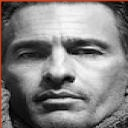

---------------


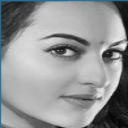

---------------


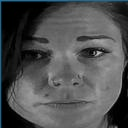

---------------


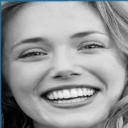

---------------


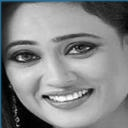

---------------


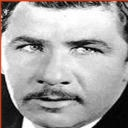

---------------


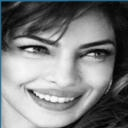

---------------


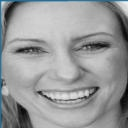

---------------


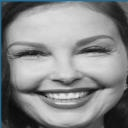

---------------


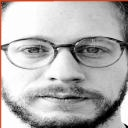

---------------


In [ ]:
# If want to run detection.
!python detect.py --weights /content/yolov7/runs/train/exp/weights/best.pt --conf 0.4 --source /content/yolov7/data/Gender-Detection-1/test/images

import glob
from IPython.display import Image, display

i = 0
limit = 10
# Check if the detect run to be printed is exp or exp1/2/...
for imageName in glob.glob('/content/yolov7/runs/detect/exp/*.jpg'):
  if i < limit:
    display(Image(filename=imageName))
    print("-"*15)
  i = i + 1